<a href="https://colab.research.google.com/github/Jay2251929205/Jiayi-Wang/blob/main/SampleProjects/Jiayi_Wang_Problem_Set_1_Demo_Ethereum_Blockchain_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**References**: https://github.com/blockchain-etl/ethereum-etl

# Problem Set 1 Checklist

**Please customize the following inputs to generate your own results for discussion**

 
* Infura/Alchemy/QuickNode API endpoints: experiment with multiple node operators and see if you could get the same data

* Data radius, start, and end blocks: pick a smaller radius for testing before you scale

* Token address: Pick your choice of token in querying the token transfer part

**Please post the sharing (Allow viewing or commenting only) URL for your Google Colab after you are done below.**

Important: Change your private API token key to "API_KEY" before posting 



## Question 1 
Did you get the same data querying via different node operators? Please point to at least one specific observation to validate your answer. 

Please insert Figures/Tables to better represent your idea. 


I have gotten same data via different node operators. The three figures below have shown that the data are the same. 

## Figure 1. Data from Quick Node

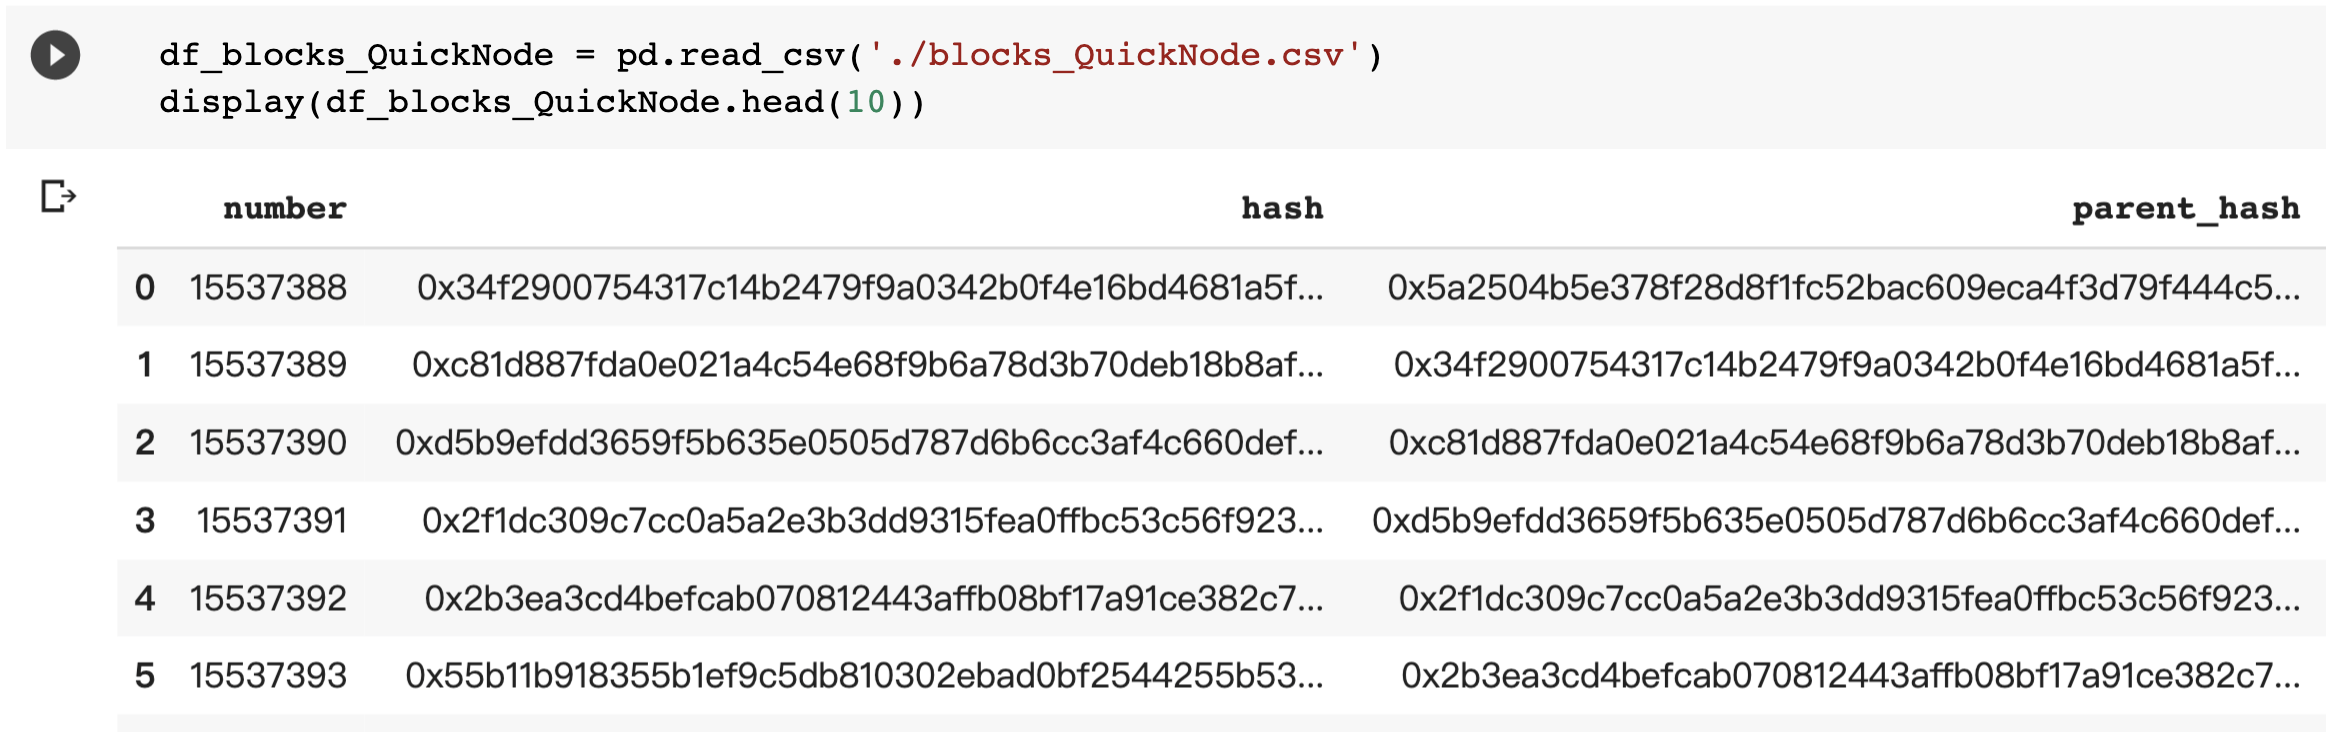

## Figure 2. Data from AIchemy

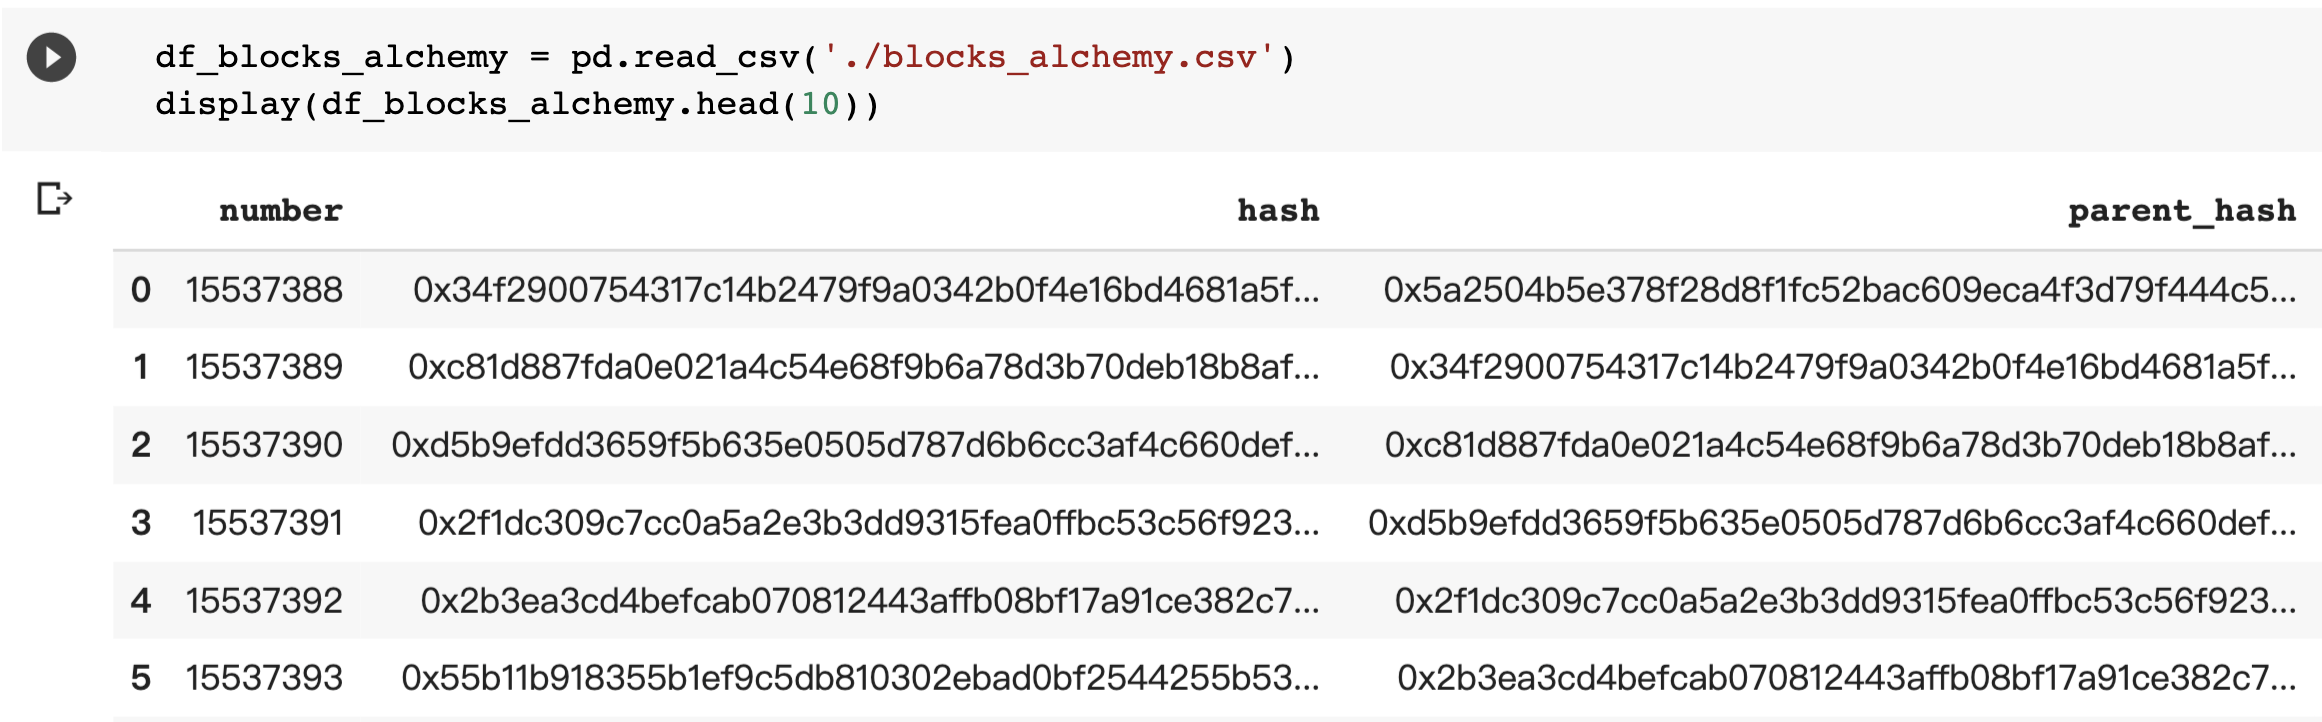

## Figure 3. Data from infura

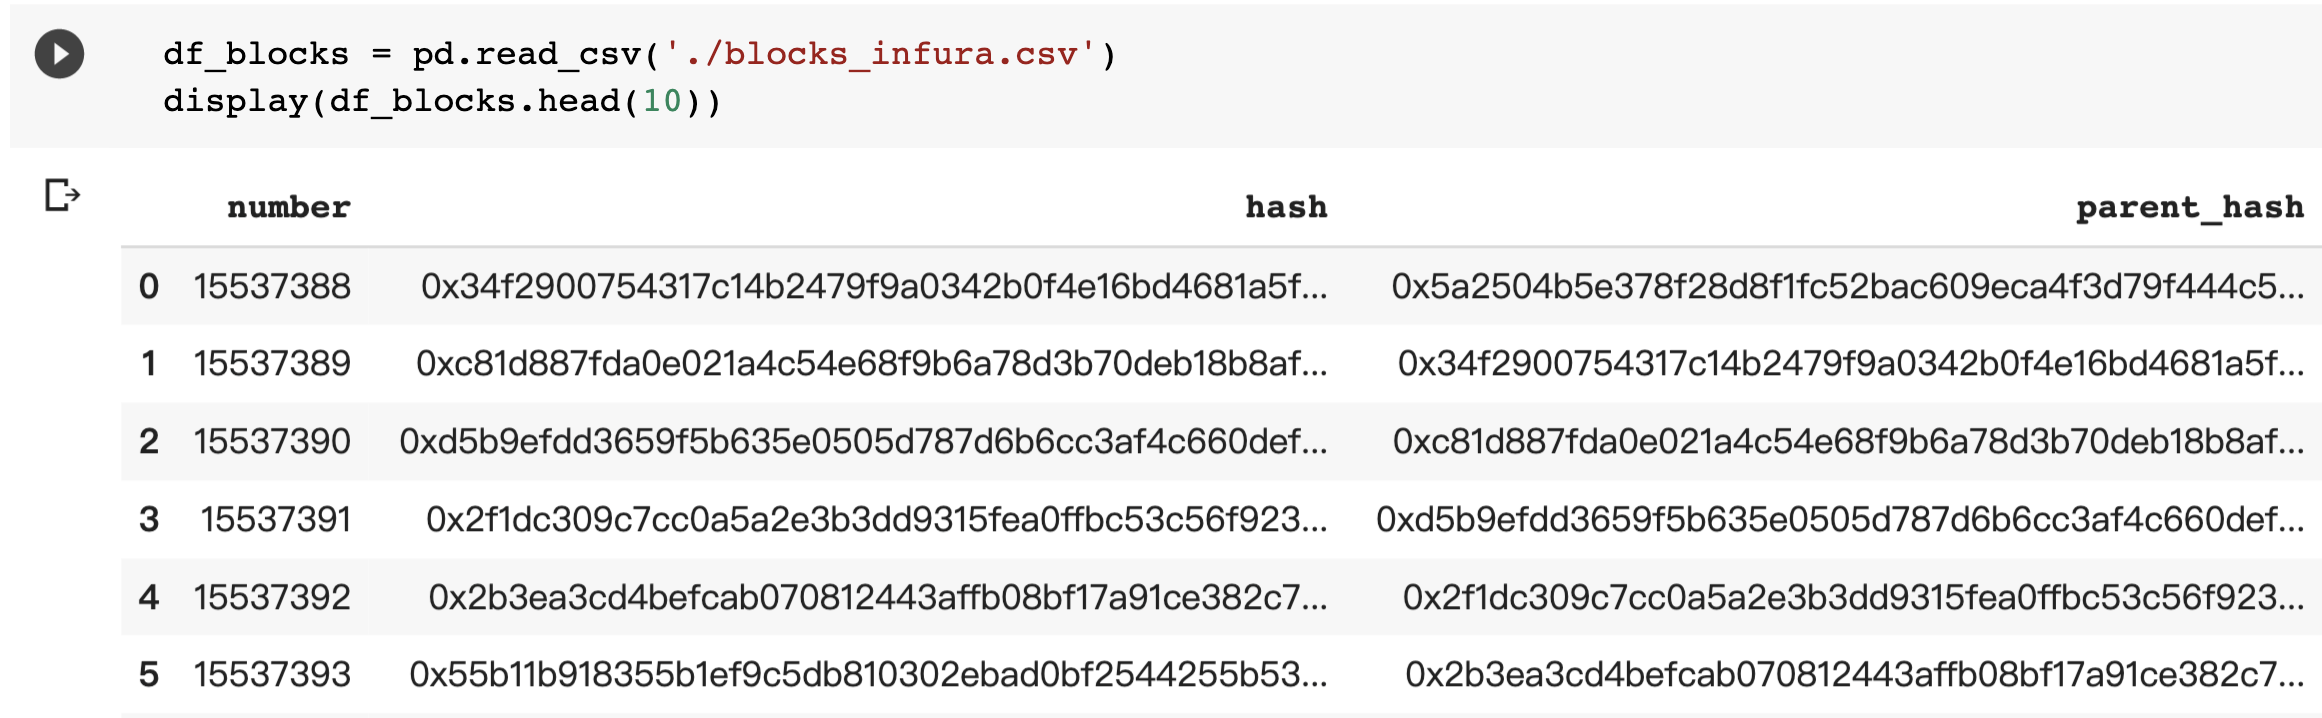

## Question 2

Please introduce the token that you queried in 100 words:


*   when the token first was issued?
*   what functions do the token support?
*.  what is the current market value of the token? 

Please provide references that could back-up your answer. 
Please insert Figures/Tables to better represent your idea. 


1. The predecessor of AAVE is initially launched in 2017, and in September 2020, the first Aave Improvemnet Proposal of its DAO voted to approve a token migration to the AAVE token. (https://www.gemini.com/cryptopedia/aave-flashloans#section-what-is-aave)
2. The token is a decentralized finance (DeFi)protocol that allows users to lend their cryptocurrencies for interest and borrow both crypto and real-world assets.(https://www.bitstamp.net/learn/cryptocurrency-guide/what-is-aave/)
3. The current price of AAVE is 57.90$ per AAVE. (https://www.coinbase.com/price/aave)

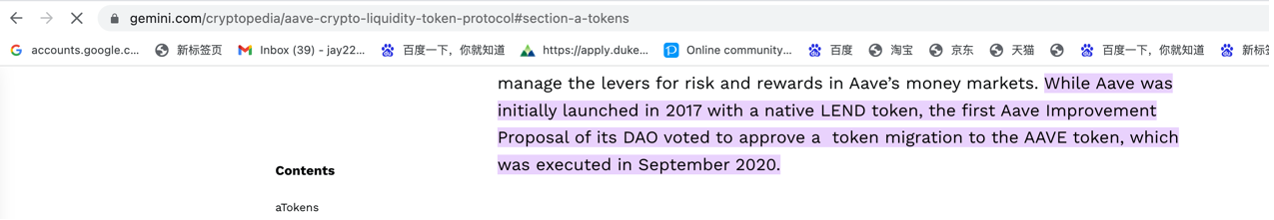

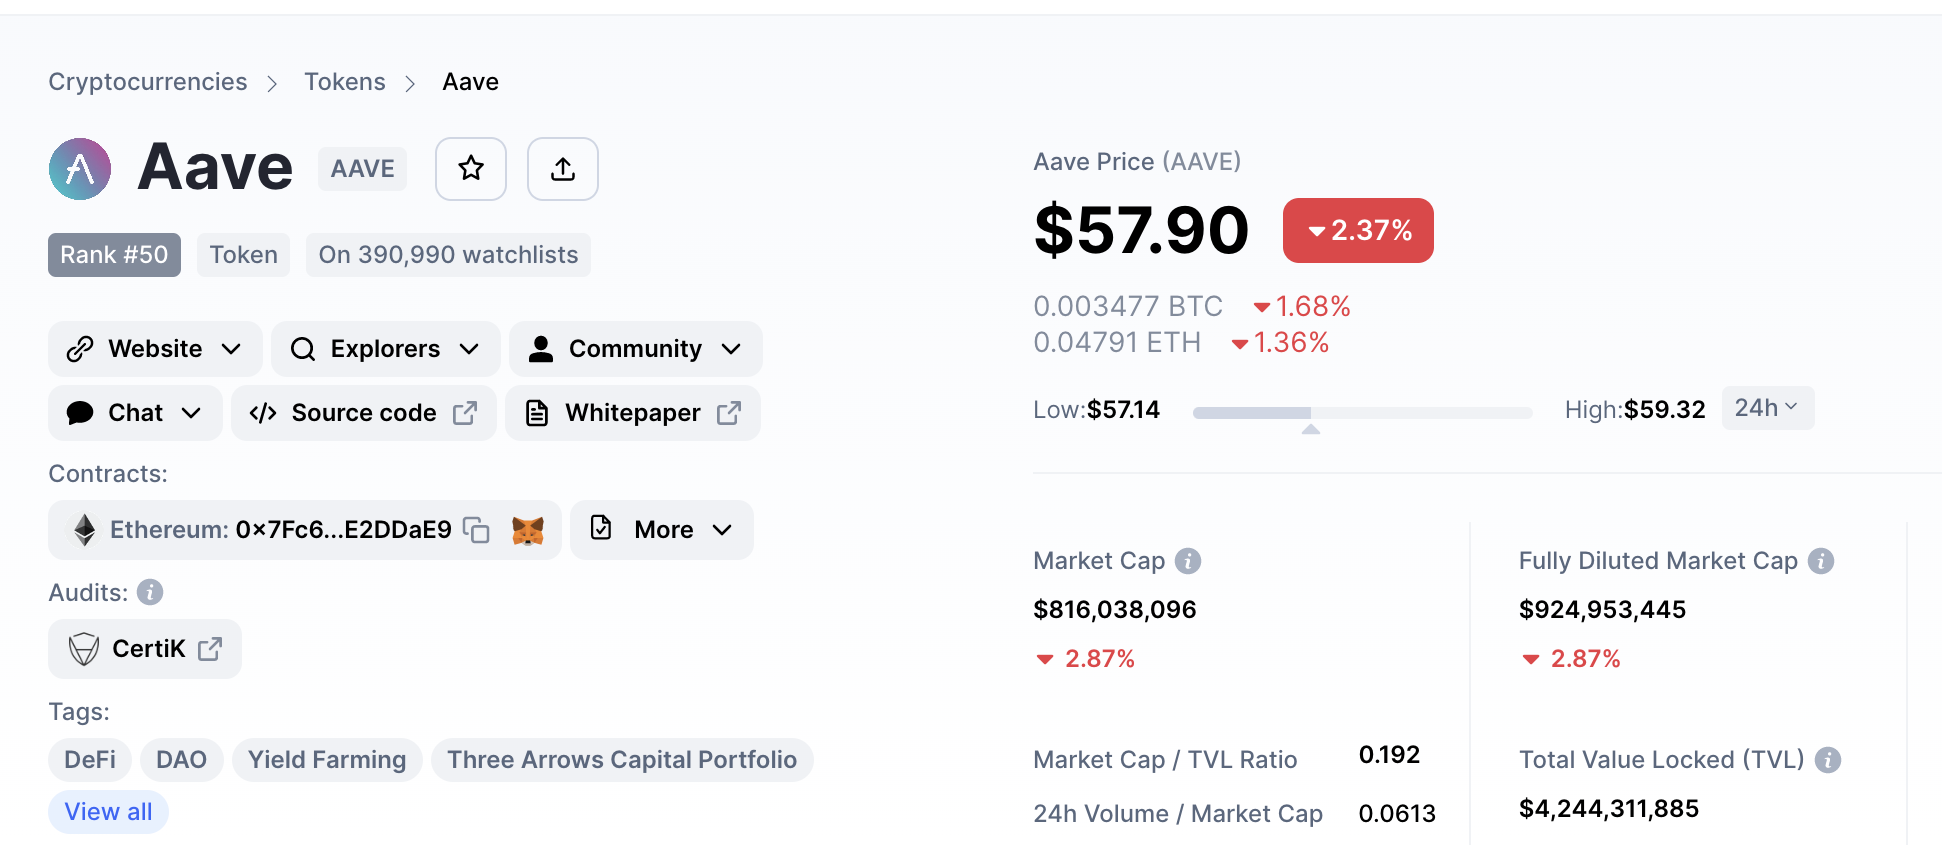

## Question 3: 

What are the changes of Ethereum before and after the merge? Please identify at least three different changes to elaborate on. 

Please provide references that could back-up your answer. 

Please insert Figures/Tables to better represent your idea. 





1. According to the recent data, before the merge, the Ethereum block time is around 0.223min(13.38s), while after the merge, it is around 0.200min(12s).(https://bitinfocharts.com/comparison/ethereum-confirmationtime.html#1y)
2. After the merge, Ethereum energy consumption has been saved by ~99.5%. (https://ethereum.org/en/upgrades/merge/)
3. After the merge, the wealth of stakers becomes more important, and thus the biggest owners can gain outsize sway in the Ethereum ecosystem, which is a move away from the decentralized ethos that so many cryptocurrency proponents value.(https://www.nerdwallet.com/article/investing/the-ethereum-merge-is-coming-what-it-means-for-you) 

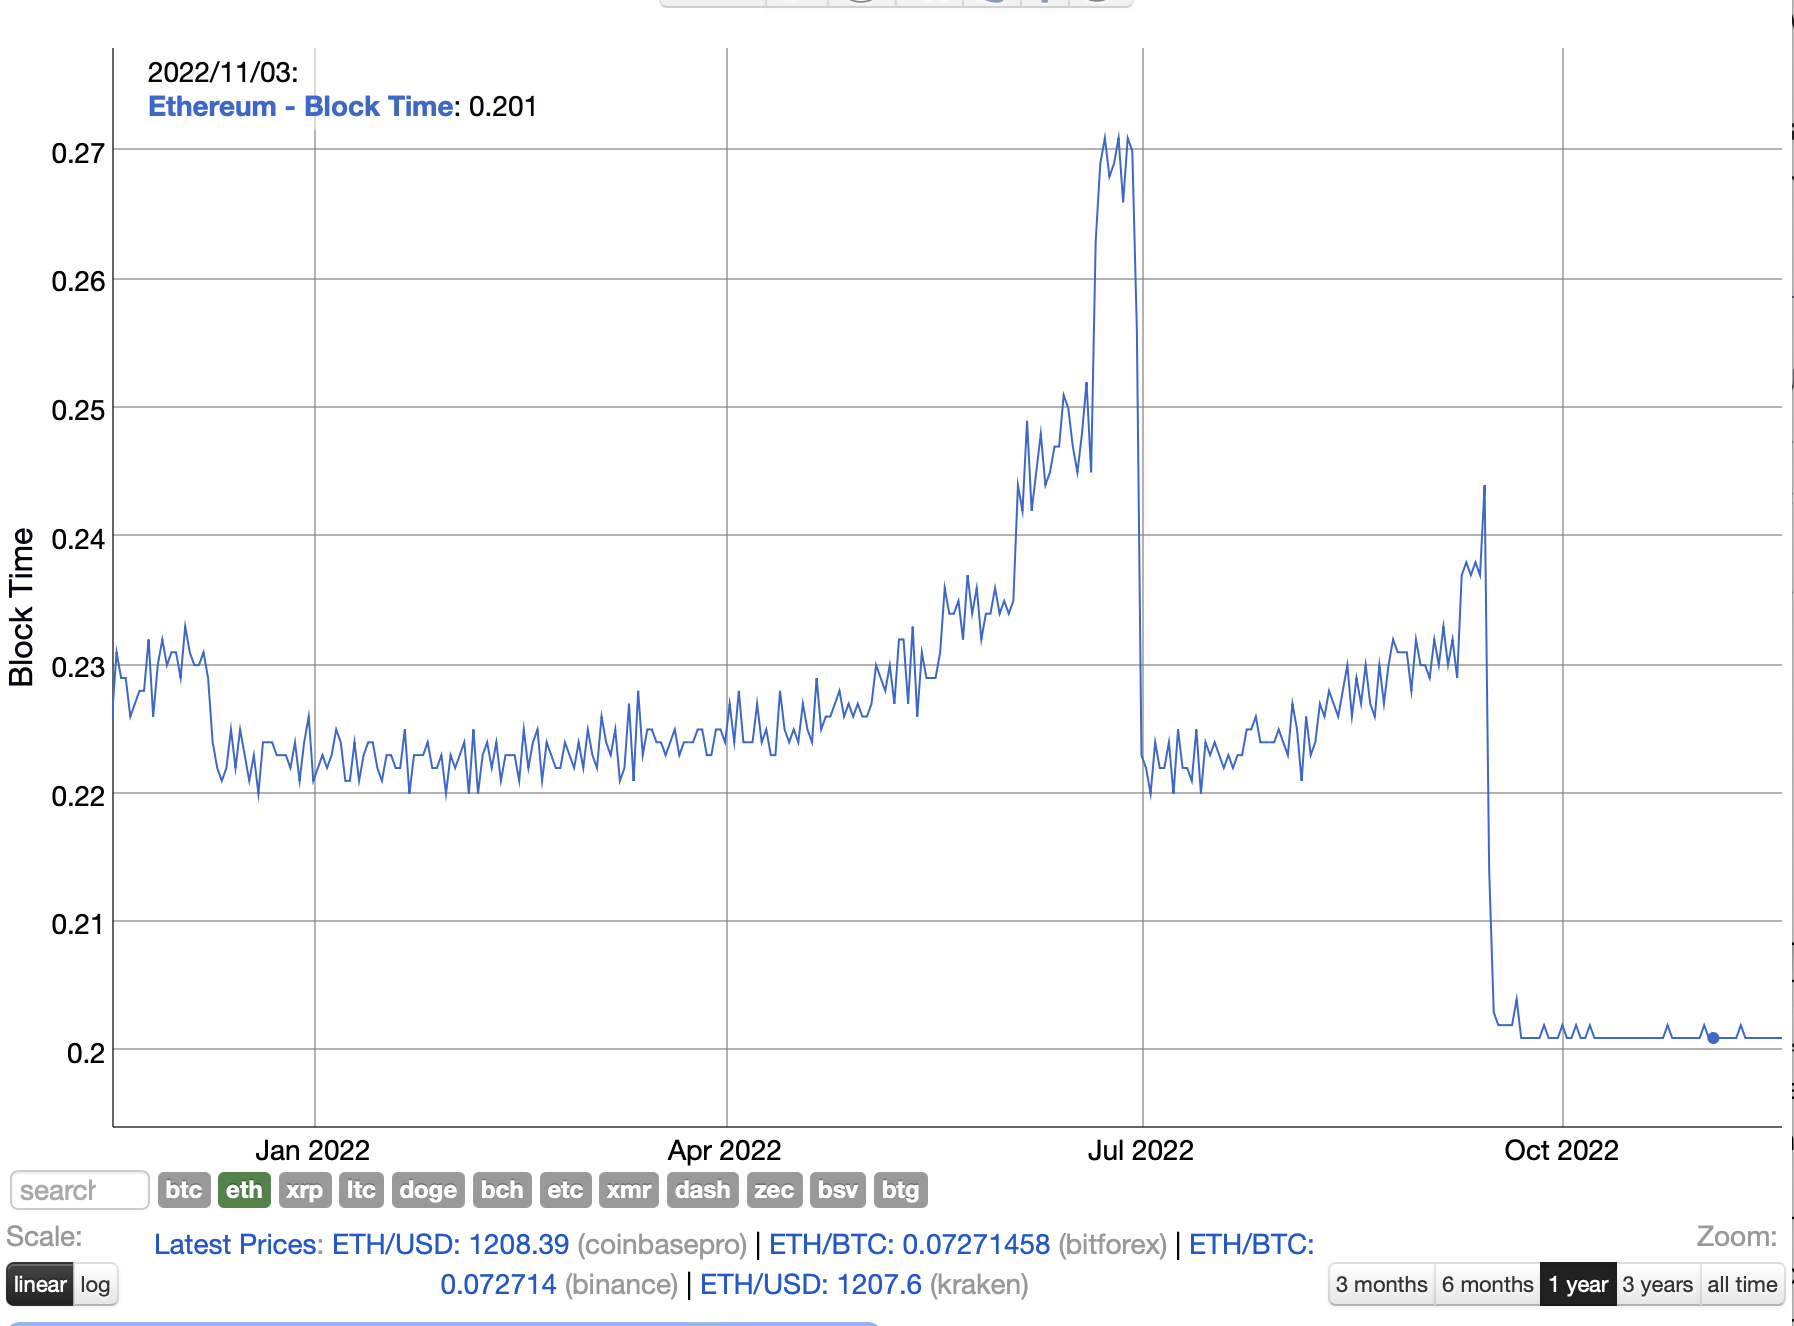

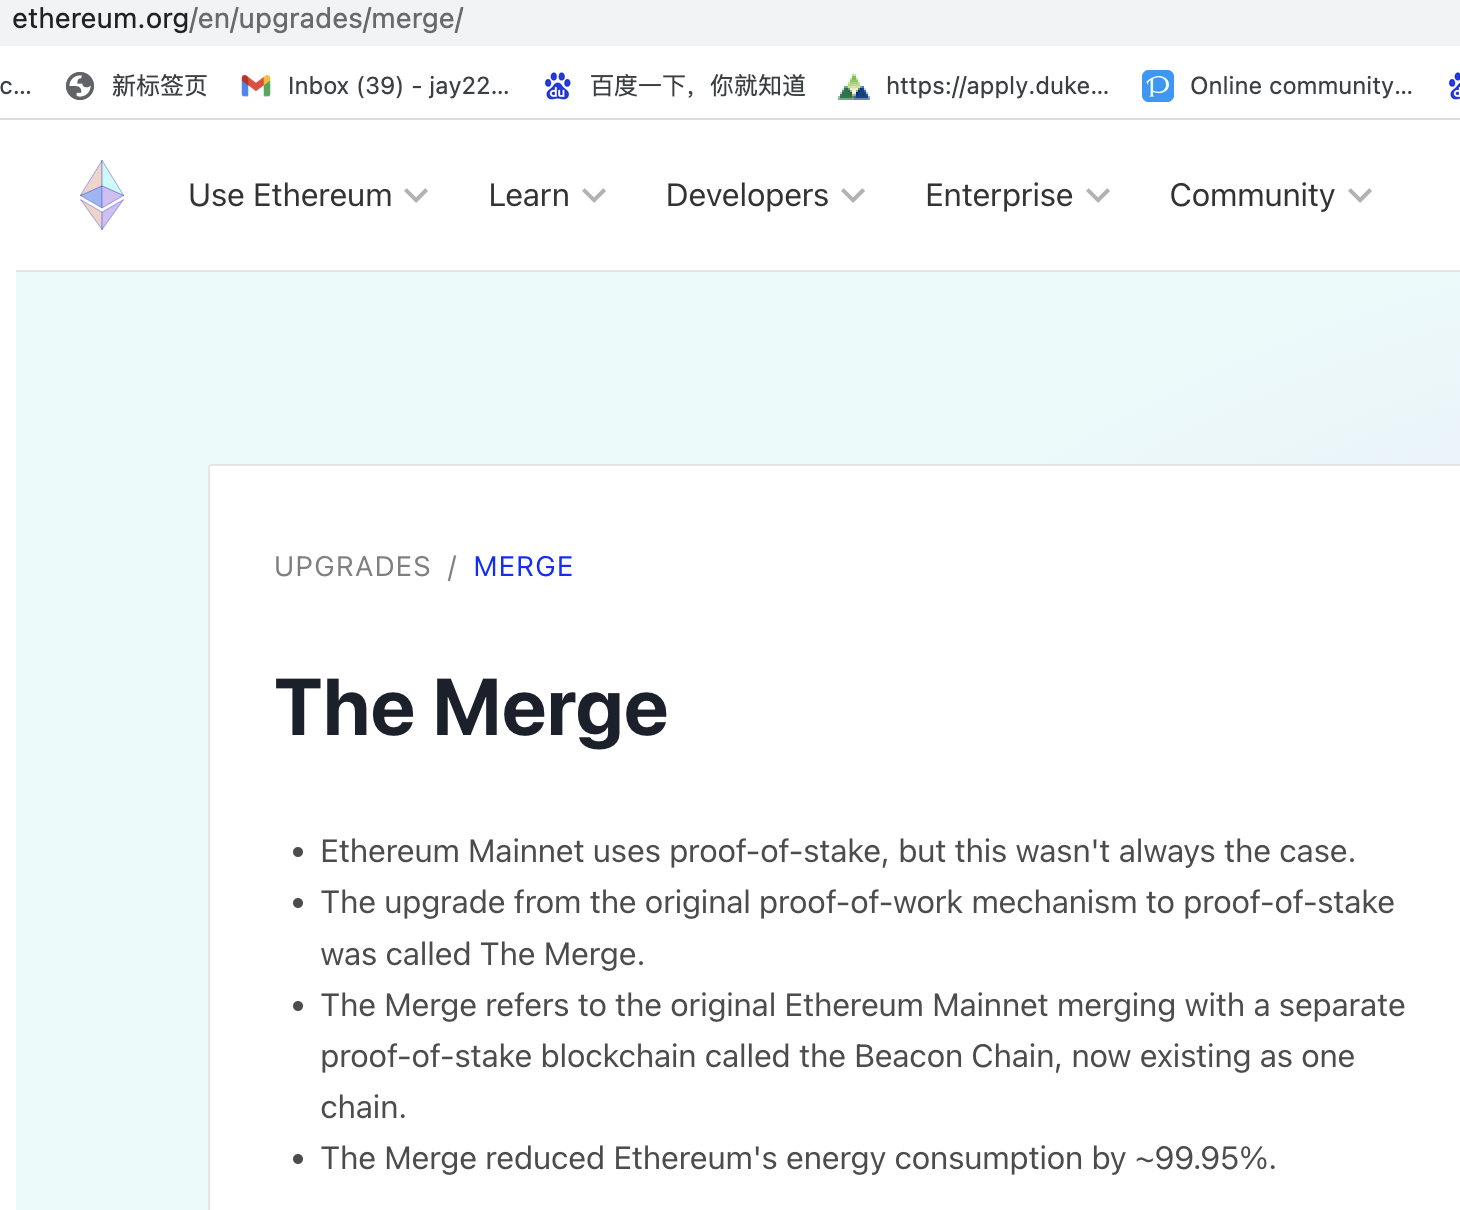

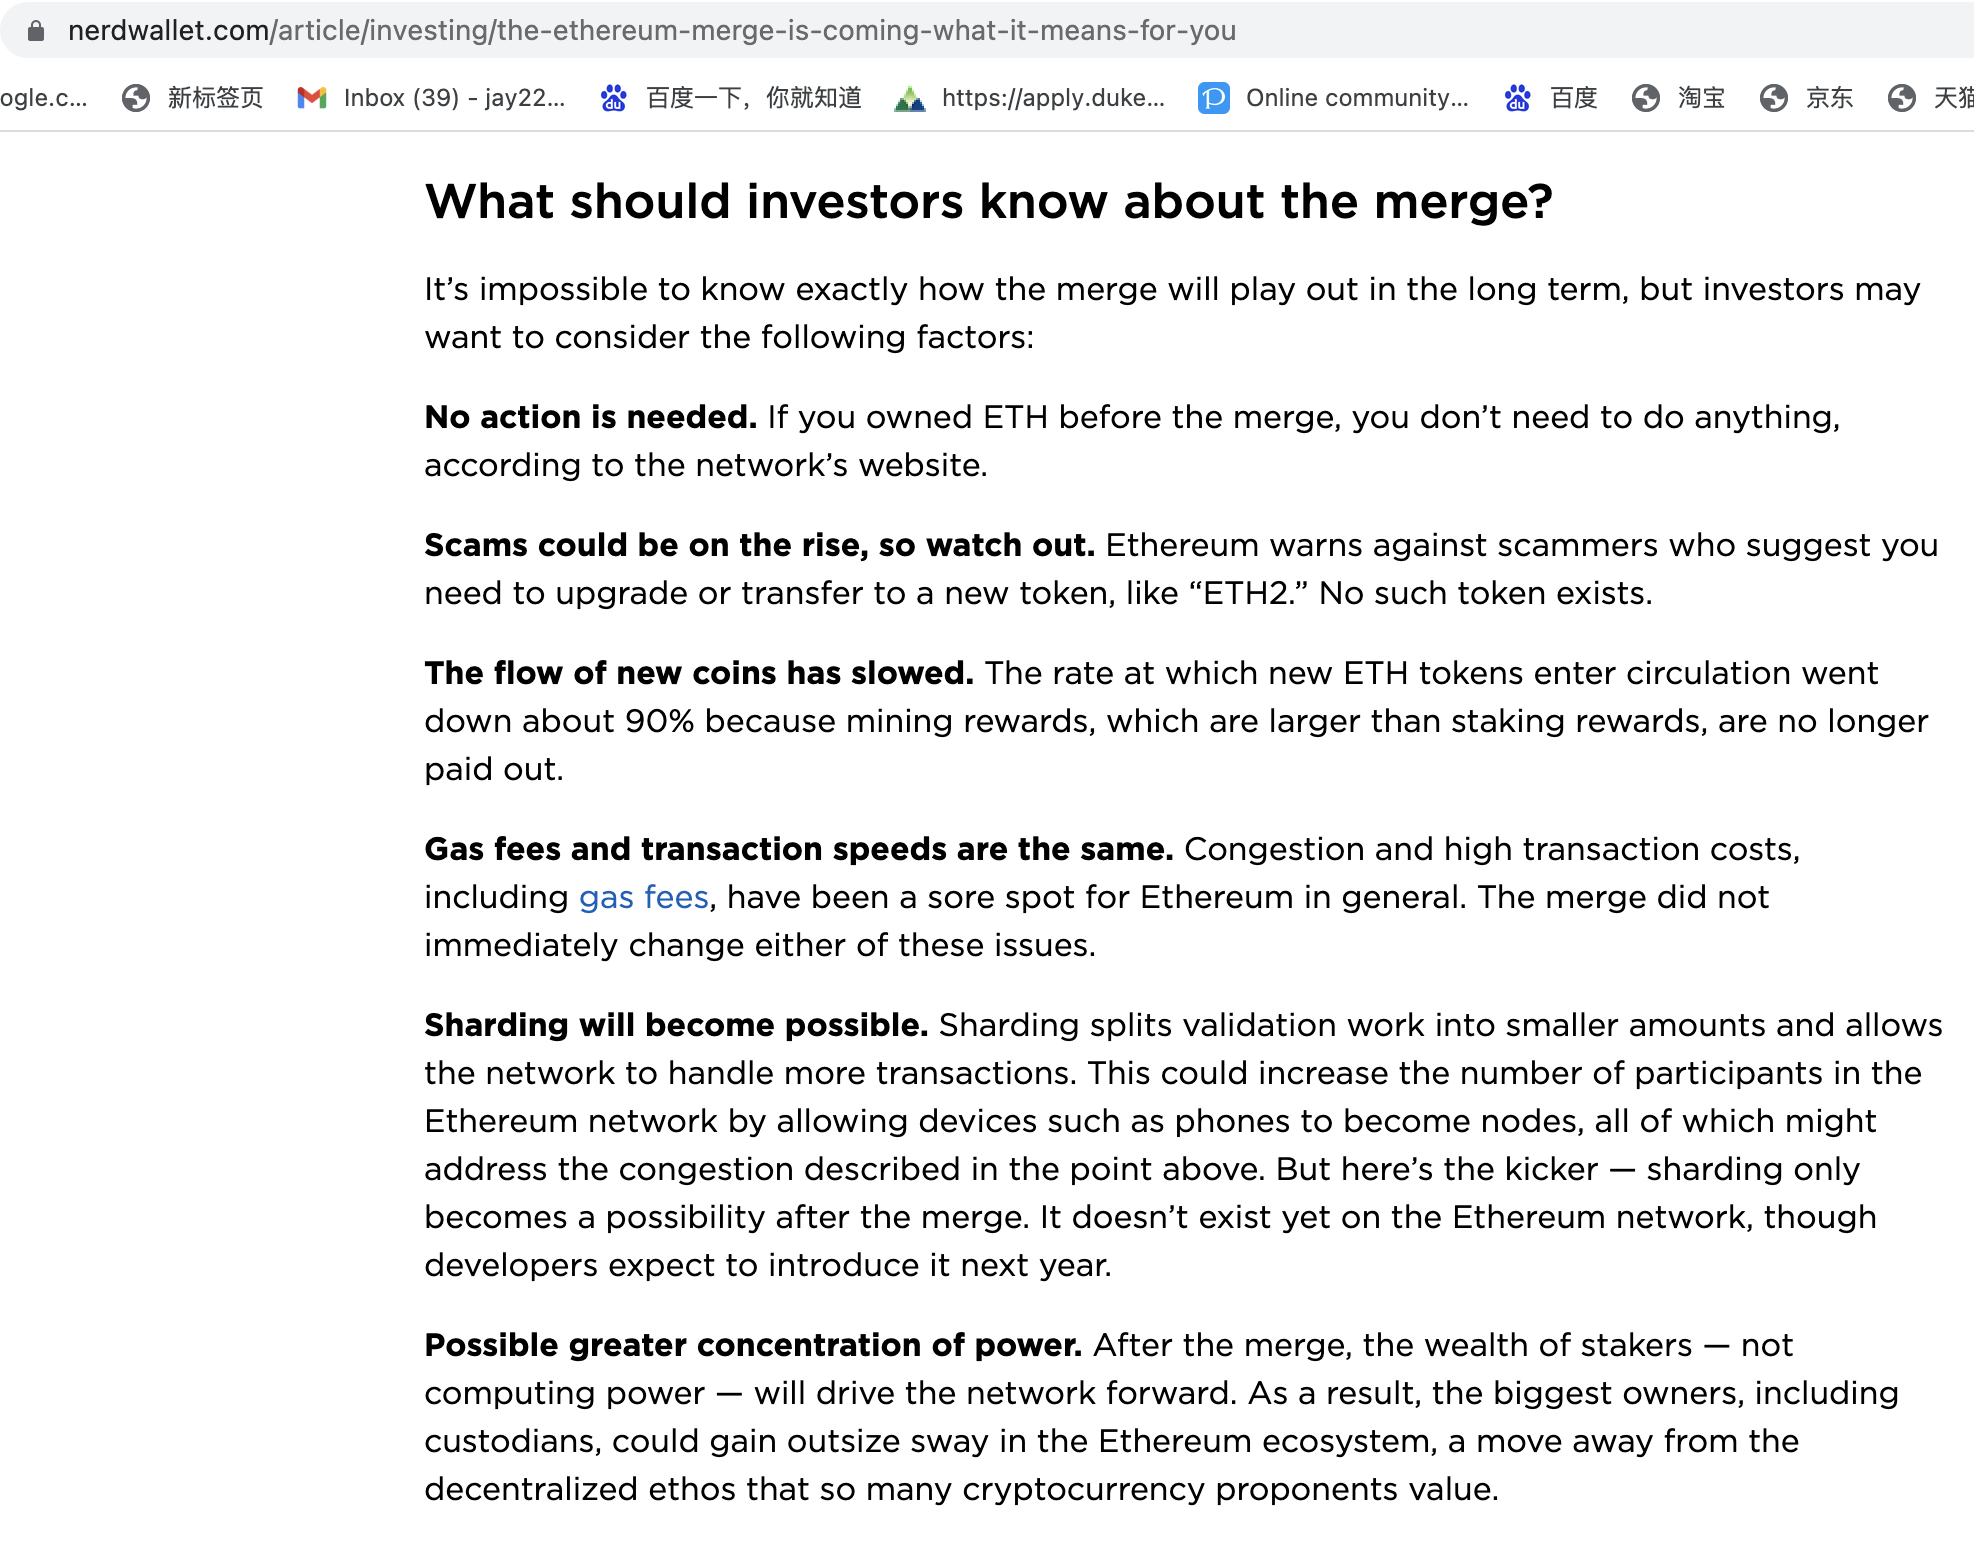

# Part I: Install Required Dependancies 

In [ ]:
# install ethereum-etl and pandas
!python -m pip install ethereum-etl pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Part II: Mount Google Drive for Result Exports

In [ ]:
# mount google drive
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# print the current directory
!pwd

/content


In [ ]:
#@title path
#create a project folder and identify the path
path = "/content/drive/MyDrive/EthereumETL" #@param {type:"string"}


In [ ]:
#go to your project folder 
%cd /content/drive/MyDrive/EthereumETL

/content/drive/MyDrive/EthereumETL


In [ ]:
# print the current directory again to make sure that you are in the project folder
!pwd

/content/drive/MyDrive/EthereumETL


# Part III: Query Data and Export CSV

## 0.Register Accounts on Remote Nodes Service and Get the URLs of the Nodes

### Remote node option 1: Infura

!!! Important Notes: Please replace https://mainnet.infura.io/v3/API_KEY with your own endpoints for all the codes below

In [ ]:
#@title Import using the Infura node
infura_end_points_URL = "https://mainnet.infura.io/v3/API_KEY" #@param {type:"string"}


### Remote node option 2: Alchemy 

In [ ]:
#@title import using Alchemy
alchemy_end_points_URL = "https://eth-mainnet.g.alchemy.com/v2/API_KEY" #@param {type:"string"}


### Remote node option 3: QuickNode

In [ ]:
#@title import using QuickNode
QuickNode_end_points_URL = "https://intensive-light-flower.discover.quiknode.pro/API_KEY" #@param {type:"string"}




Data Range: We are going to query the block and transaction data for the ethereum blockchain before and after the merge (block number: 15537393 on September 15)

Reference; 
https://www.investopedia.com/ethereum-completes-the-merge-6666337



In [ ]:
#@title the merge
merge = 15537393 #@param {type:"number"}

In [ ]:
#@title data radius
radius = 5 #@param {type:"number"}


In [ ]:
### find the start and the end
start = merge-radius
end = merge+radius
print(start, end)

15537388 15537398


## 1. Query Block Data

### using the infura endpoint

In [ ]:
!ethereumetl export_blocks_and_transactions --start-block 15537388 --end-block 15537398 --blocks-output blocks_infura.csv --provider-uri https://mainnet.infura.io/v3/API_KEY

2022-11-12 16:16:00,569 - ProgressLogger [INFO] - Started work. Items to process: 11.
2022-11-12 16:16:01,230 - ProgressLogger [INFO] - 11 items processed. Progress is 100%.
2022-11-12 16:16:01,230 - ProgressLogger [INFO] - Finished work. Total items processed: 11. Took 0:00:00.661634.
2022-11-12 16:16:01,231 - CompositeItemExporter [INFO] - block items exported: 11
2022-11-12 16:16:01,231 - CompositeItemExporter [INFO] - transaction items exported: 0


In [ ]:
# import libraries to print data frame
import pandas as pd

In [ ]:
# set to print the maximum numbers of rows
pd.set_option('display.max_rows', None)

In [ ]:
df_blocks = pd.read_csv('./blocks_infura.csv')
display(df_blocks.head(10))

,number,hash,parent_hash,nonce,sha3_uncles,logs_bloom,transactions_root,state_root,receipts_root,miner,difficulty,total_difficulty,size,extra_data,gas_limit,gas_used,timestamp,transaction_count,base_fee_per_gas
0,15537388,0x34f2900754317c14b2479f9a0342b0f4e16bd4681a5f...,0x5a2504b5e378f28d8f1fc52bac609eca4f3d79f444c5...,0x9206e9a5cae2058c,0x1dcc4de8dec75d7aab85b567b6ccd41ad312451b948a...,0x502e0487a11080051205989994081820ca2800204251...,0xfb0a569d9a40d1c3ade913ca4eeac661550a6161fd4e...,0x98efdb8d69e7596b660ba0fea82d36f28864e0f95478...,0xaeba43330764722ccfa8b0c76f2c76fb54023a3804ac...,0xea674fdde714fd979de3edf0f56aa9716b898ec8,11031474385146923,58749948497083790670458,19789,0x6575726f70652d77657374332d38,30000000,15109407,1663224133,114,37190466833
1,15537389,0xc81d887fda0e021a4c54e68f9b6a78d3b70deb18b8af...,0x34f2900754317c14b2479f9a0342b0f4e16bd4681a5f...,0xebba2908368ba3fb,0x1dcc4de8dec75d7aab85b567b6ccd41ad312451b948a...,0x5620abc2a149744b80aa62dda3b974586111019d6104...,0x094b940cd0e1f500e15294d602ce5afcb178d08bbf10...,0xbf7fcb19e96cb3f211717553f58327f8e168403749e6...,0x3b7c1fba752ca54fba30f885ee25db1ecbafdc82956a...,0xea674fdde714fd979de3edf0f56aa9716b898ec8,11032024140960811,58749959529107931631269,36493,0x617369612d65617374322d3131,30029295,26226335,1663224142,175,37224374311
2,15537390,0xd5b9efdd3659f5b635e0505d787d6b6cc3af4c660def...,0xc81d887fda0e021a4c54e68f9b6a78d3b70deb18b8af...,0x1f07464e8175235f,0x1dcc4de8dec75d7aab85b567b6ccd41ad312451b948a...,0x10004008011000010810002c00c00040104204008440...,0xe16b12997e99393fab92f787e8fceb9880f226e62ed4...,0xde56e0e536fab72545f5c2e54be0fcbdf644cd551eee...,0x9befb155572b619e15a0af9f0cc56148903d4ef28534...,0x829bd824b016326a401d083b33d092293333a830,11037960627312277,58749970567068558943546,7807,0xe4b883e5bda9e7a59ee4bb99e9b1bc472121,30000000,6893891,1663224150,46,40698882159
3,15537391,0x2f1dc309c7cc0a5a2e3b3dd9315fea0ffbc53c56f923...,0xd5b9efdd3659f5b635e0505d787d6b6cc3af4c660def...,0xac2c3800025a764f,0x1dcc4de8dec75d7aab85b567b6ccd41ad312451b948a...,0x53a240c0610070015299420086041090205a11062100...,0xd976f002afbac9fdf1b028336719b602b9f4660ca103...,0xb8d426f8c8b6ae1c34f6bebf904971be1611c29e8889...,0x6b4d994610806d8a5ed107996abc477688d4d0748763...,0x829bd824b016326a401d083b33d092293333a830,11043900012338719,58749981610968571282265,47274,0xe4b883e5bda9e7a59ee4bb99e9b1bc4b2e22,30000000,16969164,1663224155,105,37949635702
4,15537392,0x2b3ea3cd4befcab070812443affb08bf17a91ce382c7...,0x2f1dc309c7cc0a5a2e3b3dd9315fea0ffbc53c56f923...,0x232b0043952c93d9,0x1dcc4de8dec75d7aab85b567b6ccd41ad312451b948a...,0xffffffffffffffffffffffffffffffffffffffffffff...,0x82864b3a65d1ac1917c426d48915dca0fc966fbf3f30...,0xfee48a40a2765ab31fcd06ab6956341d13dc2c4b9762...,0x13c10513b52358022f800e2f9f1c50328798427b1b4a...,0xea674fdde714fd979de3edf0f56aa9716b898ec8,11049842297455506,58749992660810868737771,16568,0x617369612d65617374322d31763932,30000000,29990952,1663224156,61,38572377838
5,15537393,0x55b11b918355b1ef9c5db810302ebad0bf2544255b53...,0x2b3ea3cd4befcab070812443affb08bf17a91ce382c7...,0x62a3ee77461d4fc9,0x1dcc4de8dec75d7aab85b567b6ccd41ad312451b948a...,0x00000400000000000000000000000000000000000000...,0xdd5eec02b019ff76e359b09bfa19395a2a0e97bc01e7...,0x4919dafa6ac8becfbbd0c2808f6c9511a057c21e4283...,0xbaa842cfd552321a9c2450576126311e071680a12580...,0x829bd824b016326a401d083b33d092293333a830,11055787484078698,58750003716598352816469,1636,0xe4b883e5bda9e7a59ee4bb99e9b1bc460021,30000000,29991429,1663224162,1,43391016710
6,15537394,0x56a9bb0302da44b8c0b3df540781424684c3af04d0b7...,0x55b11b918355b1ef9c5db810302ebad0bf2544255b53...,0x0000000000000000,0x1dcc4de8dec75d7aab85b567b6ccd41ad312451b948a...,0xffffffffffffffffffffffffffffffffffffffffffff...,0x1ea1746468686159ce730c1cc49a886721244e5d1fa9...,0x40c07091e16263270f3579385090fea02dd5f061ba67...,0x928073fb98ce316265ea35d95ab7e2e1206cecd85242...,0xeee27662c2b8eba3cd936a23f039f3189633e4c8,0,58750003716598352816469,18559,0x,30000000,29983006,1663224179,80,

### query blockchain data using the alchemy endpoint


In [ ]:
!ethereumetl export_blocks_and_transactions --start-block 15537388 --end-block 15537398 --blocks-output blocks_alchemy.csv --provider-uri https://eth-mainnet.g.alchemy.com/v2/API_KEY


2022-11-12 16:11:42,623 - ProgressLogger [INFO] - Started work. Items to process: 11.
2022-11-12 16:11:42,984 - ProgressLogger [INFO] - 11 items processed. Progress is 100%.
2022-11-12 16:11:42,985 - ProgressLogger [INFO] - Finished work. Total items processed: 11. Took 0:00:00.361531.
2022-11-12 16:11:42,986 - CompositeItemExporter [INFO] - block items exported: 11
2022-11-12 16:11:42,986 - CompositeItemExporter [INFO] - transaction items exported: 0


In [ ]:
df_blocks_alchemy = pd.read_csv('./blocks_alchemy.csv')
display(df_blocks_alchemy.head(10))

,number,hash,parent_hash,nonce,sha3_uncles,logs_bloom,transactions_root,state_root,receipts_root,miner,difficulty,total_difficulty,size,extra_data,gas_limit,gas_used,timestamp,transaction_count,base_fee_per_gas
0,15537388,0x34f2900754317c14b2479f9a0342b0f4e16bd4681a5f...,0x5a2504b5e378f28d8f1fc52bac609eca4f3d79f444c5...,0x9206e9a5cae2058c,0x1dcc4de8dec75d7aab85b567b6ccd41ad312451b948a...,0x502e0487a11080051205989994081820ca2800204251...,0xfb0a569d9a40d1c3ade913ca4eeac661550a6161fd4e...,0x98efdb8d69e7596b660ba0fea82d36f28864e0f95478...,0xaeba43330764722ccfa8b0c76f2c76fb54023a3804ac...,0xea674fdde714fd979de3edf0f56aa9716b898ec8,11031474385146923,58749948497083790670458,19789,0x6575726f70652d77657374332d38,30000000,15109407,1663224133,114,37190466833
1,15537389,0xc81d887fda0e021a4c54e68f9b6a78d3b70deb18b8af...,0x34f2900754317c14b2479f9a0342b0f4e16bd4681a5f...,0xebba2908368ba3fb,0x1dcc4de8dec75d7aab85b567b6ccd41ad312451b948a...,0x5620abc2a149744b80aa62dda3b974586111019d6104...,0x094b940cd0e1f500e15294d602ce5afcb178d08bbf10...,0xbf7fcb19e96cb3f211717553f58327f8e168403749e6...,0x3b7c1fba752ca54fba30f885ee25db1ecbafdc82956a...,0xea674fdde714fd979de3edf0f56aa9716b898ec8,11032024140960811,58749959529107931631269,36493,0x617369612d65617374322d3131,30029295,26226335,1663224142,175,37224374311
2,15537390,0xd5b9efdd3659f5b635e0505d787d6b6cc3af4c660def...,0xc81d887fda0e021a4c54e68f9b6a78d3b70deb18b8af...,0x1f07464e8175235f,0x1dcc4de8dec75d7aab85b567b6ccd41ad312451b948a...,0x10004008011000010810002c00c00040104204008440...,0xe16b12997e99393fab92f787e8fceb9880f226e62ed4...,0xde56e0e536fab72545f5c2e54be0fcbdf644cd551eee...,0x9befb155572b619e15a0af9f0cc56148903d4ef28534...,0x829bd824b016326a401d083b33d092293333a830,11037960627312277,58749970567068558943546,7807,0xe4b883e5bda9e7a59ee4bb99e9b1bc472121,30000000,6893891,1663224150,46,40698882159
3,15537391,0x2f1dc309c7cc0a5a2e3b3dd9315fea0ffbc53c56f923...,0xd5b9efdd3659f5b635e0505d787d6b6cc3af4c660def...,0xac2c3800025a764f,0x1dcc4de8dec75d7aab85b567b6ccd41ad312451b948a...,0x53a240c0610070015299420086041090205a11062100...,0xd976f002afbac9fdf1b028336719b602b9f4660ca103...,0xb8d426f8c8b6ae1c34f6bebf904971be1611c29e8889...,0x6b4d994610806d8a5ed107996abc477688d4d0748763...,0x829bd824b016326a401d083b33d092293333a830,11043900012338719,58749981610968571282265,47274,0xe4b883e5bda9e7a59ee4bb99e9b1bc4b2e22,30000000,16969164,1663224155,105,37949635702
4,15537392,0x2b3ea3cd4befcab070812443affb08bf17a91ce382c7...,0x2f1dc309c7cc0a5a2e3b3dd9315fea0ffbc53c56f923...,0x232b0043952c93d9,0x1dcc4de8dec75d7aab85b567b6ccd41ad312451b948a...,0xffffffffffffffffffffffffffffffffffffffffffff...,0x82864b3a65d1ac1917c426d48915dca0fc966fbf3f30...,0xfee48a40a2765ab31fcd06ab6956341d13dc2c4b9762...,0x13c10513b52358022f800e2f9f1c50328798427b1b4a...,0xea674fdde714fd979de3edf0f56aa9716b898ec8,11049842297455506,58749992660810868737771,16568,0x617369612d65617374322d31763932,30000000,29990952,1663224156,61,38572377838
5,15537393,0x55b11b918355b1ef9c5db810302ebad0bf2544255b53...,0x2b3ea3cd4befcab070812443affb08bf17a91ce382c7...,0x62a3ee77461d4fc9,0x1dcc4de8dec75d7aab85b567b6ccd41ad312451b948a...,0x00000400000000000000000000000000000000000000...,0xdd5eec02b019ff76e359b09bfa19395a2a0e97bc01e7...,0x4919dafa6ac8becfbbd0c2808f6c9511a057c21e4283...,0xbaa842cfd552321a9c2450576126311e071680a12580...,0x829bd824b016326a401d083b33d092293333a830,11055787484078698,58750003716598352816469,1636,0xe4b883e5bda9e7a59ee4bb99e9b1bc460021,30000000,29991429,1663224162,1,43391016710
6,15537394,0x56a9bb0302da44b8c0b3df540781424684c3af04d0b7...,0x55b11b918355b1ef9c5db810302ebad0bf2544255b53...,0x0000000000000000,0x1dcc4de8dec75d7aab85b567b6ccd41ad312451b948a...,0xffffffffffffffffffffffffffffffffffffffffffff...,0x1ea1746468686159ce730c1cc49a886721244e5d1fa9...,0x40c07091e16263270f3579385090fea02dd5f061ba67...,0x928073fb98ce316265ea35d95ab7e2e1206cecd85242...,0xeee27662c2b8eba3cd936a23f039f3189633e4c8,0,58750003716598352816469,18559,0x,30000000,29983006,1663224179,80,

### query the data using the QuickNode endpoint

In [ ]:
!ethereumetl export_blocks_and_transactions --start-block 15537388 --end-block 15537398 --blocks-output blocks_QuickNode.csv --provider-uri https://intensive-light-flower.discover.quiknode.pro/API_KEY

2022-11-12 16:54:20,865 - ProgressLogger [INFO] - Started work. Items to process: 11.
2022-11-12 16:54:21,438 - ProgressLogger [INFO] - 11 items processed. Progress is 100%.
2022-11-12 16:54:21,438 - ProgressLogger [INFO] - Finished work. Total items processed: 11. Took 0:00:00.573036.
2022-11-12 16:54:21,439 - CompositeItemExporter [INFO] - block items exported: 11
2022-11-12 16:54:21,439 - CompositeItemExporter [INFO] - transaction items exported: 0


In [ ]:
df_blocks_QuickNode = pd.read_csv('./blocks_QuickNode.csv')
display(df_blocks_QuickNode.head(10))

,number,hash,parent_hash,nonce,sha3_uncles,logs_bloom,transactions_root,state_root,receipts_root,miner,difficulty,total_difficulty,size,extra_data,gas_limit,gas_used,timestamp,transaction_count,base_fee_per_gas
0,15537388,0x34f2900754317c14b2479f9a0342b0f4e16bd4681a5f...,0x5a2504b5e378f28d8f1fc52bac609eca4f3d79f444c5...,0x9206e9a5cae2058c,0x1dcc4de8dec75d7aab85b567b6ccd41ad312451b948a...,0x502e0487a11080051205989994081820ca2800204251...,0xfb0a569d9a40d1c3ade913ca4eeac661550a6161fd4e...,0x98efdb8d69e7596b660ba0fea82d36f28864e0f95478...,0xaeba43330764722ccfa8b0c76f2c76fb54023a3804ac...,0xea674fdde714fd979de3edf0f56aa9716b898ec8,11031474385146923,58749948497083790670458,19789,0x6575726f70652d77657374332d38,30000000,15109407,1663224133,114,37190466833
1,15537389,0xc81d887fda0e021a4c54e68f9b6a78d3b70deb18b8af...,0x34f2900754317c14b2479f9a0342b0f4e16bd4681a5f...,0xebba2908368ba3fb,0x1dcc4de8dec75d7aab85b567b6ccd41ad312451b948a...,0x5620abc2a149744b80aa62dda3b974586111019d6104...,0x094b940cd0e1f500e15294d602ce5afcb178d08bbf10...,0xbf7fcb19e96cb3f211717553f58327f8e168403749e6...,0x3b7c1fba752ca54fba30f885ee25db1ecbafdc82956a...,0xea674fdde714fd979de3edf0f56aa9716b898ec8,11032024140960811,58749959529107931631269,36493,0x617369612d65617374322d3131,30029295,26226335,1663224142,175,37224374311
2,15537390,0xd5b9efdd3659f5b635e0505d787d6b6cc3af4c660def...,0xc81d887fda0e021a4c54e68f9b6a78d3b70deb18b8af...,0x1f07464e8175235f,0x1dcc4de8dec75d7aab85b567b6ccd41ad312451b948a...,0x10004008011000010810002c00c00040104204008440...,0xe16b12997e99393fab92f787e8fceb9880f226e62ed4...,0xde56e0e536fab72545f5c2e54be0fcbdf644cd551eee...,0x9befb155572b619e15a0af9f0cc56148903d4ef28534...,0x829bd824b016326a401d083b33d092293333a830,11037960627312277,58749970567068558943546,7807,0xe4b883e5bda9e7a59ee4bb99e9b1bc472121,30000000,6893891,1663224150,46,40698882159
3,15537391,0x2f1dc309c7cc0a5a2e3b3dd9315fea0ffbc53c56f923...,0xd5b9efdd3659f5b635e0505d787d6b6cc3af4c660def...,0xac2c3800025a764f,0x1dcc4de8dec75d7aab85b567b6ccd41ad312451b948a...,0x53a240c0610070015299420086041090205a11062100...,0xd976f002afbac9fdf1b028336719b602b9f4660ca103...,0xb8d426f8c8b6ae1c34f6bebf904971be1611c29e8889...,0x6b4d994610806d8a5ed107996abc477688d4d0748763...,0x829bd824b016326a401d083b33d092293333a830,11043900012338719,58749981610968571282265,47274,0xe4b883e5bda9e7a59ee4bb99e9b1bc4b2e22,30000000,16969164,1663224155,105,37949635702
4,15537392,0x2b3ea3cd4befcab070812443affb08bf17a91ce382c7...,0x2f1dc309c7cc0a5a2e3b3dd9315fea0ffbc53c56f923...,0x232b0043952c93d9,0x1dcc4de8dec75d7aab85b567b6ccd41ad312451b948a...,0xffffffffffffffffffffffffffffffffffffffffffff...,0x82864b3a65d1ac1917c426d48915dca0fc966fbf3f30...,0xfee48a40a2765ab31fcd06ab6956341d13dc2c4b9762...,0x13c10513b52358022f800e2f9f1c50328798427b1b4a...,0xea674fdde714fd979de3edf0f56aa9716b898ec8,11049842297455506,58749992660810868737771,16568,0x617369612d65617374322d31763932,30000000,29990952,1663224156,61,38572377838
5,15537393,0x55b11b918355b1ef9c5db810302ebad0bf2544255b53...,0x2b3ea3cd4befcab070812443affb08bf17a91ce382c7...,0x62a3ee77461d4fc9,0x1dcc4de8dec75d7aab85b567b6ccd41ad312451b948a...,0x00000400000000000000000000000000000000000000...,0xdd5eec02b019ff76e359b09bfa19395a2a0e97bc01e7...,0x4919dafa6ac8becfbbd0c2808f6c9511a057c21e4283...,0xbaa842cfd552321a9c2450576126311e071680a12580...,0x829bd824b016326a401d083b33d092293333a830,11055787484078698,58750003716598352816469,1636,0xe4b883e5bda9e7a59ee4bb99e9b1bc460021,30000000,29991429,1663224162,1,43391016710
6,15537394,0x56a9bb0302da44b8c0b3df540781424684c3af04d0b7...,0x55b11b918355b1ef9c5db810302ebad0bf2544255b53...,0x0000000000000000,0x1dcc4de8dec75d7aab85b567b6ccd41ad312451b948a...,0xffffffffffffffffffffffffffffffffffffffffffff...,0x1ea1746468686159ce730c1cc49a886721244e5d1fa9...,0x40c07091e16263270f3579385090fea02dd5f061ba67...,0x928073fb98ce316265ea35d95ab7e2e1206cecd85242...,0xeee27662c2b8eba3cd936a23f039f3189633e4c8,0,58750003716598352816469,18559,0x,30000000,29983006,1663224179,80,

## 2. Query Transaction Data

In [ ]:
!ethereumetl export_blocks_and_transactions --start-block 15537388 --end-block 15537398 --transactions-output transactions.csv --provider-uri https://intensive-light-flower.discover.quiknode.pro/API_KEY

2022-11-12 16:58:15,775 - ProgressLogger [INFO] - Started work. Items to process: 11.
2022-11-12 16:58:16,544 - ProgressLogger [INFO] - 11 items processed. Progress is 100%.
2022-11-12 16:58:16,544 - ProgressLogger [INFO] - Finished work. Total items processed: 11. Took 0:00:00.769048.
2022-11-12 16:58:16,545 - CompositeItemExporter [INFO] - block items exported: 0
2022-11-12 16:58:16,546 - CompositeItemExporter [INFO] - transaction items exported: 1140


In [ ]:
df_transactions = pd.read_csv('./transactions.csv')
display(df_transactions.head())

,hash,nonce,block_hash,block_number,transaction_index,from_address,to_address,value,gas,gas_price,input,block_timestamp,max_fee_per_gas,max_priority_fee_per_gas,transaction_type
0,0x1ccbdb9913d35d7f870ba1822159ae4ca1f660faa208...,0,0x34f2900754317c14b2479f9a0342b0f4e16bd4681a5f...,15537388,0,0xb6d44ba99e6e31ca00a888a5232ff332b0d607a3,0xb6d44ba99e6e31ca00a888a5232ff332b0d607a3,0,180000,131914672959,0x,1663224133,1.319147e+11,1.120000e+11,2
1,0x414e84145408904ac945a108ab946edcec19185a2c94...,113,0x34f2900754317c14b2479f9a0342b0f4e16bd4681a5f...,15537388,1,0x87033ad96757ecd730aa1652b1a7dabcc5ffb182,0x68b3465833fb72a70ecdf485e0e4c7bd8665fc45,150000000000000000,253035,67190466833,0x5ae401dc000000000000000000000000000000000000...,1663224133,1.201975e+11,3.000000e+10,2
2,0xc3decb6a4a09de496947b85da6f0195ce8ee3afceb9e...,1280,0x34f2900754317c14b2479f9a0342b0f4e16bd4681a5f...,15537388,2,0x4ffb72b66eba24521736924f87dfe10677d82286,0x7bc25283a29a3888cab4555ea86ff1a8c18cc90a,0,180000,67190466833,0x1249c58b,1663224133,3.000000e+11,3.000000e+10,2
3,0xe72ef9baee086d62ded0f80e124d01c7f703f9a46d65...,13,0x34f2900754317c14b2479f9a0342b0f4e16bd4681a5f...,15537388,3,0xb73f92d089fceb224cfe24a916bdd3b9bd0f6666,0xc4ee0aa2d993ca7c9263ecfa26c6f7e13009d2b6,0,56694,51128340341,0x095ea7b30000000000000000000000006fbf1b6a6813...,1663224133,NaN,NaN,0
4,0xd82e5c7f0392e94c5228f4e0bdb827212a9e84463849...,9108,0x34f2900754317c14b2479f9a0342b0f4e16bd4681a5f...,15537388,4,0x7dacfce9eacdca48cad5ba0b61560586c375890b,0xe2b8eb988735f7709d08b7d07b41460073904830,0,291019,50901357660,0x00000000000000000000000000000000000000000000...,1663224133,5.090136e+10,1.444116e+10,2


## 3. Query Token Data

### 3.1 Query All Token Transfers

In [ ]:
!ethereumetl export_token_transfers --start-block 15537388 --end-block 15537398 --provider-uri https://intensive-light-flower.discover.quiknode.pro/API_KEY --output token_transfers.csv

2022-11-12 16:58:22,809 - ProgressLogger [INFO] - Started work. Items to process: 11.
2022-11-12 16:58:34,865 - ProgressLogger [INFO] - 11 items processed. Progress is 100%.
2022-11-12 16:58:34,865 - ProgressLogger [INFO] - Finished work. Total items processed: 11. Took 0:00:12.056114.
2022-11-12 16:58:34,867 - CompositeItemExporter [INFO] - token_transfer items exported: 30889


In [ ]:
df_token_transfers = pd.read_csv('./token_transfers.csv')
display(df_token_transfers.head())

,token_address,from_address,to_address,value,transaction_hash,log_index,block_number
0,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x68b3465833fb72a70ecdf485e0e4c7bd8665fc45,0x8a84c20c27d8e55a4e54ce19db0b1be4a05c6720,150000000000000000,0x414e84145408904ac945a108ab946edcec19185a2c94...,1,15537388
1,0x397abdfb6ec12e6fa24d84cbabb1505157a5caac,0x8a84c20c27d8e55a4e54ce19db0b1be4a05c6720,0x397abdfb6ec12e6fa24d84cbabb1505157a5caac,2169959720320717682633283658,0x414e84145408904ac945a108ab946edcec19185a2c94...,2,15537388
2,0x397abdfb6ec12e6fa24d84cbabb1505157a5caac,0x8a84c20c27d8e55a4e54ce19db0b1be4a05c6720,0x87033ad96757ecd730aa1652b1a7dabcc5ffb182,52079033287697224383198807811,0x414e84145408904ac945a108ab946edcec19185a2c94...,3,15537388
3,0x7bc25283a29a3888cab4555ea86ff1a8c18cc90a,0x0000000000000000000000000000000000000000,0x4ffb72b66eba24521736924f87dfe10677d82286,6172,0xc3decb6a4a09de496947b85da6f0195ce8ee3afceb9e...,6,15537388
4,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,0x5720eb958685deeeb5aa0b34f677861ce3a8c7f5,0xe2b8eb988735f7709d08b7d07b41460073904830,23145141942,0xd82e5c7f0392e94c5228f4e0bdb827212a9e84463849...,8,15537388


In [ ]:
df = df_token_transfers[df_token_transfers.token_address=="0x7bc25283a29a3888cab4555ea86ff1a8c18cc90a"]
df.head()

,token_address,from_address,to_address,value,transaction_hash,log_index,block_number
3,0x7bc25283a29a3888cab4555ea86ff1a8c18cc90a,0x0000000000000000000000000000000000000000,0x4ffb72b66eba24521736924f87dfe10677d82286,6172,0xc3decb6a4a09de496947b85da6f0195ce8ee3afceb9e...,6,15537388
11,0x7bc25283a29a3888cab4555ea86ff1a8c18cc90a,0x0000000000000000000000000000000000000000,0xe8fcd7bdb10280786a5b81ffde44924b12d1f038,6173,0x4ef5e95799dbe1eff4bc909dd14bcdf98627090c1a4f...,21,15537388
12,0x7bc25283a29a3888cab4555ea86ff1a8c18cc90a,0x0000000000000000000000000000000000000000,0x8b90d68eedad4be67e1087528d5ec9003009d667,6174,0x945850db8500d073f4496541340d9b5b27c71a46d96a...,22,15537388
13,0x7bc25283a29a3888cab4555ea86ff1a8c18cc90a,0x0000000000000000000000000000000000000000,0xf93040508f5748fd1d5d5ada09c079cc160d168c,6175,0x77ec0b8fe7104ec7cb38d592d90a3c733b0a50d894b4...,23,15537388
14,0x7bc25283a29a3888cab4555ea86ff1a8c18cc90a,0x0000000000000000000000000000000000000000,0x2d0623a594f25070b69f01371aff2347bfaee56d,6176,0x7489f295214cb79a27fbe4ba6e3a29632a4d6e07f9a2...,24,15537388


### 3.1 Query a specific token transfers

*references*:

* Commond Documentations: https://ethereum-etl.readthedocs.io/en/latest/commands/
* Token Address: https://github.com/blockchain-etl/ethereum-etl-airflow/blob/master/dags/resources/stages/seed/data/token_amendments.csv
* More detailed: https://github.com/blockchain-etl/ethereum-etl-airflow
* Proof-of-Reserve: https://blog.chain.link/stablecoins-and-proof-of-reserve/





In [ ]:
#@title Token Name
Token_Name = "Aave Token" #@param {type:"string"}



In [ ]:
#@title Token Symbol
Token_Symbol = "AAVE" #@param {type:"string"}


In [ ]:
#@title Token Address
token_address = "0x7Fc66500c84A76Ad7e9c93437bFc5Ac33E2DDaE9" #@param {type:"string"}


In [ ]:
!ethereumetl export_token_transfers --start-block 13131313 --end-block 13131323 --provider-uri https://clean-restless-scion.discover.quiknode.pro/API_KEY --output token_transfers_AAVE.csv --tokens 0x7Fc66500c84A76Ad7e9c93437bFc5Ac33E2DDaE9

2022-11-12 21:09:59,862 - ProgressLogger [INFO] - Started work. Items to process: 11.
2022-11-12 21:10:00,476 - ProgressLogger [INFO] - 11 items processed. Progress is 100%.
2022-11-12 21:10:00,476 - ProgressLogger [INFO] - Finished work. Total items processed: 11. Took 0:00:00.614185.
2022-11-12 21:10:00,477 - CompositeItemExporter [INFO] - token_transfer items exported: 2


In [ ]:
df_token_transfers_AAVE = pd.read_csv('./token_transfers_AAVE.csv')
display(df_token_transfers_AAVE.head())

,token_address,from_address,to_address,value,transaction_hash,log_index,block_number
0,0x7fc66500c84a76ad7e9c93437bfc5ac33e2ddae9,0x2779bae0b0c699c49194a0f29b959408a83ee42b,0x916ed5586bb328e0ec1a428af060dc3d10919d84,641194580000000000,0xd5c9ee6f5616a5b0387a694bf8370b7c03eca095a5b6...,85,13131315
1,0x7fc66500c84a76ad7e9c93437bfc5ac33e2ddae9,0xd1f0b2018c1b7056c1301877b080dcb8e3c3390a,0xa6aac20c2f51101a92a01e28c8da87927677f9cc,1174000000000000000,0xca0144e33c711a9b909345f12212bda309afe38f2f73...,62,13131320
